In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
df.shape

(546, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


DataCleaning

In [6]:
df.isnull().sum()*100/df.shape[0]

Unnamed: 0    0.0
price         0.0
lotsize       0.0
bedrooms      0.0
bathrms       0.0
stories       0.0
driveway      0.0
recroom       0.0
fullbase      0.0
gashw         0.0
airco         0.0
garagepl      0.0
prefarea      0.0
dtype: float64

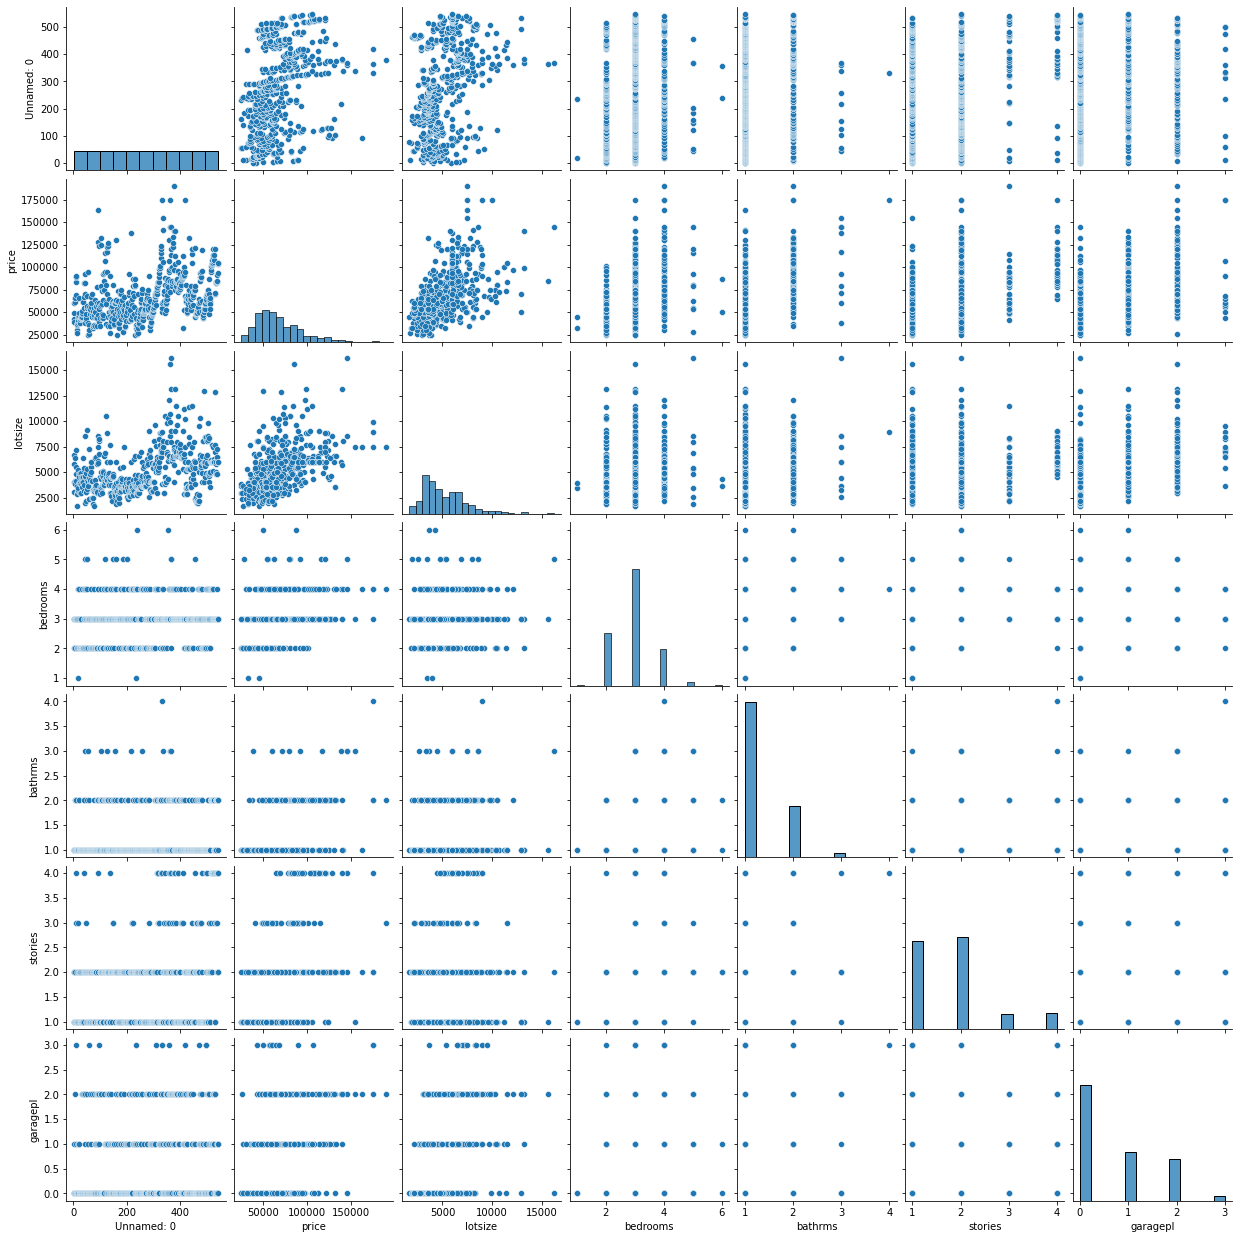

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
features =  ['driveway','recroom','fullbase','gashw' ,'airco', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

df[features] = df[features].apply(binary_map)

In [9]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [10]:
df.drop('Unnamed: 0', inplace=True, axis = 1)

In [11]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [12]:
X = df.drop('price', axis=1)
y = df['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)


In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print("Mean Squared Error:", mse)

Mean Squared Error: 256524986.51986215
